# Data Cleaning & Preparation
## Using Airbnb Data

<img src='airbnb_photo.JPG'>
<i>Image by <a href="https://pixabay.com/users/instagramfotografin-5746148/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=3399753">InstagramFOTOGRAFIN</a> from <a href="https://pixabay.com/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=3399753">Pixabay</a></i>

It is often said that an analyst spends 80% or more of their time on data preparation tasks such as cleaning, transforming and rearranging data. In this module, we will discuss ways to handle missing data, duplicate data, string manipulation and other types of transformations.

When we first explore a topic, we will use a simple example to explain the process. Then you will practice by implementing a similar transformation using a real world dataset in a more complex way.

For this module, we will be working with data from [Airbnb](https://www.airbnb.com/), one of the top travel websites where hosts can list their properties or rooms for vacation rental. The ultimate goal of working with this data is to see if we can predict a property's price based on its specific attributes. We will specifically be using data from Vienna, Austria.

The Airbnb city data comes from [Inside Airbnb](http://insideairbnb.com/get-the-data.html), an investigatory website that focuses on highlighting illegal renting through Airbnb and how Airbnb affects property values in an area. The data is sourced directly from the Airbnb website and is updated monthly. 

The data is ‘messy’ with long text fields, large amounts of missing data and many features that might not have any correlation with prices. An example of the ‘messiness’ of the data can be found in the ‘amenities’ feature. Each property has a list of amenities that it provides, some standard from the Airbnb website and some that are entered directly by the property owners. This data will need to be pulled apart and cleaned, with new features added based on these amenities.

**Note 1:** In order to better show examples of data transformations, some of the data has been adjusted for teaching purposes. If you want to do any further data analysis, please download the actual data from the link above.

**Note 2:** We are only using Pandas and Numpy for these data transformations. In future classes, you will learn about additional, sometimes easier, options such as using Scikit-learn for some of these transformations. But even these options use Pandas and Numpy as their base.

## Table of Contents
1. [Import Data](#import)
2. [Initial Data Exploration](#exploration)
3. [Missing Data](#missing)
[<ul>Filtering Missing Data</ul>](#filter)
[<ul>Dropping Missing Data</ul>](#drop)
[<ul>Filling Missing Data</ul>](#filling)
4. [Data Transformation](#transformation)
[<ul>Removing Duplicates</ul>](#remove_dupes)
[<ul>Transforming Data Using a Function or Mapping</ul>](#map)
[<ul>Replacing Values</ul>](#replace)
[<ul>Binning</ul>](#bin)
[<ul>Detecting & Filtering Outliers</ul>](#outlier)
[<ul>Dummy Variables</ul>](#dummy)
5. [String Manipulation](#string)
[<ul>String Object Methods</ul>](#string_object)
[<ul>Regular Expressions</ul>](#regex)
6. [Extra Practice](#import)
7. [Conclusion](#conclusion)

## Import Data<a name="import"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# set display columns to max so that we can view all columns
pd.set_option('display.max_columns', None)

In [2]:
# import the Vienna dataset
vienna_raw = pd.read_csv('listings_vienna.csv', index_col='id')

# saving raw data as new dataframe for exploration
# copy of data so don't have to reimport later in case we loose the csv
vienna = vienna_raw.copy()

## Initial Data Exploration<a name="exploration"></a>

In [3]:
# view first few rows
vienna.head()

,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15883,https://www.airbnb.com/rooms/15883,2.020000e+13,4/15/2021,b&b near Old Danube river,"Four rooms, each one differently and individua...",small and personal<br /><br />Four rooms at th...,https://a0.muscache.com/pictures/18eff738-a737...,62142.0,https://www.airbnb.com/users/show/62142,Eva,12/11/2009,"Vienna, Wien, Austria",Mein größtes Hobby: Reisen! Am liebsten mit me...,NaN,NaN,100%,f,https://a0.muscache.com/im/pictures/user/24166...,https://a0.muscache.com/im/pictures/user/24166...,Donaustadt,6.0,6.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Vienna, Austria",Donaustadt,NaN,48.24262,16.42767,Room in bed and breakfast,Hotel room,3.0,NaN,1 bath,1.0,2.0,"[""Hot water"", ""High chair"", ""Essentials"", ""Hai...",$87.00,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,NaN,t,30.0,60.0,90.0,365.0,4/15/2021,11.0,0.0,0.0,4/10/2015,2/19/2020,95.0,10.0,10.0,10.0,10.0,9.0,9.0,NaN,t,4.0,2.0,0.0,0.0,0.15
38768,https://www.airbnb.com/rooms/38768,2.020000e+13,4/15/2021,central cityapartement- wifi- nice neighbourhood,39m² apartment with beautiful courtyard of the...,the Karmeliterviertel became very popular in t...,https://a0.muscache.com/pictures/ad4089a3-5355...,166283.0,https://www.airbnb.com/users/show/166283,Hannes,7/14/2010,"Vienna, Wien, Austria",I am open minded and like travelling myself. I...,within an hour,100%,98%,t,https://a0.muscache.com/im/users/166283/profil...,https://a0.muscache.com/im/users/166283/profil...,Leopoldstadt,3.0,3.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Vienna, Austria",Leopoldstadt,NaN,48.21924,16.37831,Entire apartment,Entire home/apt,5.0,NaN,1 bath,1.0,3.0,"[""Cooking basics"", ""Shampoo"", ""Kitchen"", ""Host...",$60.00,3.0,100.0,3.0,3.0,100.0,100.0,3.0,100.0,NaN,t,0.0,0.0,18.0,109.0,4/15/2021,324.0,11.0,0.0,3/23/2011,10/10/2020,95.0,10.0,9.0,10.0,10.0,10.0,10.0,NaN,f,3.0,3.0,0.0,0.0,2.64
40625,https://www.airbnb.com/rooms/40625,2.020000e+13,4/15/2021,"Near Palace Schönbrunn, Apt. 1",Welcome to my Apt. 1!<br /><br />This is a 2be...,The neighbourhood offers plenty of restaurants...,https://a0.muscache.com/pictures/11509144/d55c...,175131.0,https://www.airbnb.com/users/show/175131,Ingela,7/20/2010,"Vienna, Wien, Austria",I´m originally from Sweden but have been livin...,within a few hours,90%,74%,t,https://a0.muscache.com/im/users/175131/profil...,https://a0.muscache.com/im/users/175131/profil...,Rudolfsheim-Fünfhaus,16.0,16.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Vienna, Austria",Rudolfsheim-Fnfhaus,NaN,48.18434,16.32701,Entire apartment,Entire home/apt,6.0,NaN,1 bath,2.0,4.0,"[""Cooking basics

In [4]:
# view number of rows/columns
vienna.shape

(11502, 73)

In [5]:
vienna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11502 entries, 15883 to 49171797
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   11487 non-null  object 
 1   scrape_id                                     11487 non-null  float64
 2   last_scraped                                  11487 non-null  object 
 3   name                                          11473 non-null  object 
 4   description                                   11050 non-null  object 
 5   neighborhood_overview                         6589 non-null   object 
 6   picture_url                                   11487 non-null  object 
 7   host_id                                       11487 non-null  float64
 8   host_url                                      11487 non-null  object 
 9   host_name                                     11219 no

There are three different datatypes represented in the data. Notice that the `price` column, which will be our label (ie what we are trying to predict), is represented as a string instead of a number.  We will need to change this before running any type of machine learning algorithm.  Also, there are several features that have missing values. We'll take care of these as we go along.

We will analyze more of the features later, but let's first look at a few of the features in further detail: `neighborhoods in Vienna`, `property types`, `room types`, and `amenities`.

In [6]:
# view value counts for neighborhood_cleansed
vienna['neighbourhood_cleansed'].value_counts()

Leopoldstadt            1221
Landstra§e               997
Rudolfsheim-Fnfhaus     825
Alsergrund               730
Neubau                   711
Margareten               696
Innere Stadt             662
Favoriten                645
Ottakring                564
Mariahilf                553
Wieden                   502
Meidling                 449
Brigittenau              443
Josefstadt               426
Hernals                  341
Whring                  337
Donaustadt               335
Penzing                  296
Dbling                  269
Hietzing                 158
Floridsdorf              141
Simmering                121
Liesing                   70
Name: neighbourhood_cleansed, dtype: int64

In [7]:
# view value counts for property_type
vienna['property_type'].value_counts()

Entire apartment                      7524
Private room in apartment             2415
Entire serviced apartment              287
Entire condominium                     281
Entire loft                            163
Entire house                           111
Private room in house                   96
Room in boutique hotel                  89
Private room in condominium             74
Shared room in apartment                65
Private room in bed and breakfast       50
Room in serviced apartment              46
Private room in hostel                  35
Room in hotel                           30
Private room in loft                    26
Room in aparthotel                      25
Entire guest suite                      23
Private room in townhouse               16
Private room in guesthouse              15
Entire townhouse                        14
Entire villa                            12
Shared room in hostel                   10
Entire bungalow                          8
Entire plac

There are a lot of different values for this feature. We could combine some of these (example: cabin and chalet should be similar to a house) to make our list more manageable. But first, let's also look at `room_type`.

In [8]:
# view value counts for room_type
vienna['room_type'].value_counts()

Entire home/apt    8466
Private room       2853
Shared room          88
Hotel room           85
Name: room_type, dtype: int64

This seems to be similar data as the `property_type`. I'll leave both in for now and you would want to check for multi-linear correlation on your own if you were actually working on this as a project.

In [9]:
# view value counts for amenities
vienna['amenities']

id
15883       ["Hot water", "High chair", "Essentials", "Hai...
38768       ["Cooking basics", "Shampoo", "Kitchen", "Host...
40625       ["Cooking basics", "Children\u2019s books and ...
51287       ["Cooking basics", "Shampoo", "Kitchen", "Host...
70637       ["Cooking basics", "Indoor fireplace", "Shampo...
                                  ...                        
49169158    ["Shampoo", "Kitchen", "Smoke alarm", "Paid pa...
49169449    ["Cooking basics", "Essentials", "Hair dryer",...
49169526    ["Shampoo", "Dedicated workspace", "Lock on be...
49170145    ["Kitchen", "Dedicated workspace", "Record pla...
49171797    ["Indoor fireplace", "Shampoo", "Kitchen", "Lo...
Name: amenities, Length: 11502, dtype: object

The `amenities` feature is a list of available amenities for each property. This will be difficult to work with but some of these listed amenities might have an influence on the price. We will work on separating these list items out later.

After a manual review of each feature, there are several features that we can immediately remove from the dataset. First, we can drop features that are not related to price.

In [10]:
drop_features = ['listing_url','scrape_id','host_url','host_name','host_location',
                'host_neighbourhood','neighbourhood_group_cleansed','calendar_updated','license',
                'host_thumbnail_url','host_picture_url','host_verifications','host_has_profile_pic',
                'has_availability','host_total_listings_count','neighbourhood',
                'minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
                'minimum_nights_avg_ntm','maximum_nights_avg_ntm','availability_30','availability_60',
                'availability_365','calendar_last_scraped','number_of_reviews_ltm','number_of_reviews_l30d',
                'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
                'calculated_host_listings_count_shared_rooms','last_scraped','neighborhood_overview',
                 'host_about','picture_url','host_identity_verified', 'minimum_nights', 'maximum_nights', 
                 'availability_90', 'instant_bookable','bathrooms','host_total_listings_count']

vienna = vienna.drop(drop_features, axis=1)
vienna.head()

,name,description,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15883,b&b near Old Danube river,"Four rooms, each one differently and individua...",62142.0,12/11/2009,NaN,NaN,100%,f,6.0,Donaustadt,48.24262,16.42767,Room in bed and breakfast,Hotel room,3.0,1 bath,1.0,2.0,"[""Hot water"", ""High chair"", ""Essentials"", ""Hai...",$87.00,11.0,4/10/2015,2/19/2020,95.0,10.0,10.0,10.0,10.0,9.0,9.0,4.0,0.15
38768,central cityapartement- wifi- nice neighbourhood,39m² apartment with beautiful courtyard of the...,166283.0,7/14/2010,within an hour,100%,98%,t,3.0,Leopoldstadt,48.21924,16.37831,Entire apartment,Entire home/apt,5.0,1 bath,1.0,3.0,"[""Cooking basics"", ""Shampoo"", ""Kitchen"", ""Host...",$60.00,324.0,3/23/2011,10/10/2020,95.0,10.0,9.0,10.0,10.0,10.0,10.0,3.0,2.64
40625,"Near Palace Schönbrunn, Apt. 1",Welcome to my Apt. 1!<br /><br />This is a 2be...,175131.0,7/20/2010,within a few hours,90%,74%,t,16.0,Rudolfsheim-Fnfhaus,48.18434,16.32701,Entire apartment,Entire home/apt,6.0,1 bath,2.0,4.0,"[""Cooking basics"", ""Children\u2019s books and ...",$88.00,156.0,8/4/2010,2/15/2021,97.0,10.0,10.0,10.0,10.0,9.0,9.0,15.0,1.20
51287,little studio- next to citycenter- wifi- nice ...,small studio in new renovated old house and ve...,166283.0,7/14/2010,within an hour,100%,98%,t,3.0,Leopoldstadt,48.21778,16.37847,Entire apartment,Entire home/apt,3.0,1 bath,NaN,2.0,"[""Cooking basics"", ""Shampoo"", ""Kitchen"", ""Host...",$60.00,310.0,1/27/2011,1/4/2021,92.0,10.0,9.0,10.0,10.0,10.0,9.0,3.0,2.49
70637,Flat in the Center with Terrace,<b>The space</b><br />My apartment (including ...,358842.0,1/23/2011,within a few hours,100%,71%,t,3.0,Leopoldstadt,48.21760,16.38018,Private room in apartment,Private room,2.0,2 shared baths,1.0,2.0,"[""Cooking basics"", ""Indoor fireplace"", ""Shampo...",$50.00,116.0,3/28/2011,12/23/2019,95.0,10.0,9.0,10.0,9.0,10.0,10.0,3.0,0.95


In [11]:
vienna.shape

(11502, 32)

**Important:** In a real world project, we would stop here and split the data into what is called a training set and a test set. The training set is used to explore and train the data, and the test set is used at the very end to determine how new data generalizes with your model. This will be covered in much more detail in the machine learning classes.

## Missing Data<a name="missing"></a>
Missing data is very common in real world datasets and Pandas is a powerful tool in working with this missing data.

### Filtering Missing Data<a name="filter"></a>

Let's now look at some of the missing data in the dataset. First, we need to understand what data is missing (we should attempt to either find the missing data or impute it based on other data) and what data just doesn't exist (where that fact that it is missing might provide additional information -- example: no reviews for a property).

In [12]:
# creates True/False mask
vienna['beds'].isnull()

id
15883       False
38768       False
40625       False
51287       False
70637       False
            ...  
49169158    False
49169449    False
49169526    False
49170145    False
49171797    False
Name: beds, Length: 11502, dtype: bool

In [13]:
vienna['beds'].isnull().sum() # missing from data

117

This could be an example of purely missing data. Every property probably should have at least one bed listed, even if it is a non-standard bed type.

In [14]:
vienna['first_review'].isnull().sum() # doesn't exist

2352

This is an example of data that probably just doesn't exist. These properties might not have any reviews from guests. And the fact that they don't have any reviews might be important to the properties price.

### Dropping missing values<a name="drop"></a>
One way to handle missing data is to drop the values completely. This could be appropriate based on your data but remember that you might lose some other information by dropping the data.

In [15]:
#setup simple DataFrame
data = pd.DataFrame([[2.,4.,6.],[1.,np.nan,np.nan],
                     [np.nan,np.nan,np.nan],[np.nan,10.,12.]])
data

,0,1,2
0,2.0,4.0,6.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,10.0,12.0


In [16]:
# using drop_na to drop rows with missing values
data.dropna()

,0,1,2
0,2.0,4.0,6.0


In [17]:
# dropping rows where there are missing values only for column '1'
data.dropna(subset=[1])

,0,1,2
0,2.0,4.0,6.0
3,NaN,10.0,12.0


In [18]:
# using drop_na to drop columns with missing values
data.dropna(axis=1)

""
0
1
2
3


In [19]:
# using drop_na to drop rows that have all missing values
data.dropna(how='all')

,0,1,2
0,2.0,4.0,6.0
1,1.0,NaN,NaN
3,NaN,10.0,12.0


In [20]:
# using drop_na to drop rows that don't have at least 2 values
data.dropna(thresh=2)

,0,1,2
0,2.0,4.0,6.0
3,NaN,10.0,12.0


#### Student Practice
Try to perform the following tasks on the `vienna` dataset. Then check your answers as I walk through the solutions. Unless the exercise asks you to create a new DataFrame, you can assume that you are to alter the original `vienna` data.

In [21]:
# run the following code
vienna.shape

(11502, 32)

**Exercise:** Create a new DataFrame called `vienna_dropped_rows` to drop all rows from the original `vienna` dataset with missing values. 

In [22]:
vienna_dropped_rows = vienna.dropna()
vienna_dropped_rows.shape

(3724, 32)

**Exercise:** Create a new DataFrame called `vienna_dropped_rows_subset` where rows with missing values in the `bedrooms` column are dropped.

In [23]:
vienna_dropped_rows_subset = vienna.dropna(subset=['bedrooms'])
vienna_dropped_rows_subset.shape

(10171, 32)

**Exercise:** Create a new DataFrame called `vienna_dropped_cols` where columns with missing values are dropped.

In [24]:
vienna_dropped_cols = vienna.dropna(axis=1)

vienna_dropped_cols.shape

(11502, 0)

**Exercise:** Drop rows from the `vienna` dataset that have only missing values. 

In [25]:
vienna.dropna(how='all').shape

(11492, 32)

**Exercise:** Drop rows from the `vienna` dataset that don't have at least 10 values.

In [26]:
vienna.dropna(thresh=10).shape

(11487, 32)

### Filling Missing Data<a name="filling"></a>

Instead of simply discarding data and potentially losing information from other data that goes along with it, sometimes it's better to fill the missing data. This can be done in a number of different ways.

In [27]:
# setup example DataFrame
data = pd.DataFrame(np.random.randn(7, 3))
data.iloc[:4, 1] = np.nan
data.iloc[:2, 2] = np.nan
data

,0,1,2
0,-0.097785,NaN,NaN
1,-0.518532,NaN,NaN
2,-0.200229,NaN,-0.295784
3,0.625878,NaN,1.000499
4,0.156668,-0.092616,-0.654063
5,-0.773012,-1.405650,3.265541
6,2.794799,-0.356644,0.455672


In [28]:
# using fillna with a constant 
data.fillna(0)

,0,1,2
0,-0.097785,0.000000,0.000000
1,-0.518532,0.000000,0.000000
2,-0.200229,0.000000,-0.295784
3,0.625878,0.000000,1.000499
4,0.156668,-0.092616,-0.654063
5,-0.773012,-1.405650,3.265541
6,2.794799,-0.356644,0.455672


In [29]:
# using fillna with a dictionary for potential different values
data.fillna({1: 1.5, 2:-1.5})

,0,1,2
0,-0.097785,1.500000,-1.500000
1,-0.518532,1.500000,-1.500000
2,-0.200229,1.500000,-0.295784
3,0.625878,1.500000,1.000499
4,0.156668,-0.092616,-0.654063
5,-0.773012,-1.405650,3.265541
6,2.794799,-0.356644,0.455672


In [30]:
# same interpolation methods available for reindexing can be used with fillna
df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = np.nan
df.iloc[4:, 2] = np.nan
df

,0,1,2
0,-1.101385,-0.307201,-1.270593
1,0.072933,-0.630511,0.119904
2,0.281113,NaN,-0.853286
3,0.804062,NaN,0.945558
4,-1.279718,NaN,NaN
5,-0.921409,NaN,NaN


In [31]:
# using 'ffill' 'forward fill'
df.fillna(method='ffill')

,0,1,2
0,-1.101385,-0.307201,-1.270593
1,0.072933,-0.630511,0.119904
2,0.281113,-0.630511,-0.853286
3,0.804062,-0.630511,0.945558
4,-1.279718,-0.630511,0.945558
5,-0.921409,-0.630511,0.945558


In [32]:
# using 'ffill' with limit
df.fillna(method='ffill', limit=2)

,0,1,2
0,-1.101385,-0.307201,-1.270593
1,0.072933,-0.630511,0.119904
2,0.281113,-0.630511,-0.853286
3,0.804062,-0.630511,0.945558
4,-1.279718,NaN,0.945558
5,-0.921409,NaN,0.945558


In [33]:
# using the mean of each column
df.fillna(df.mean())

,0,1,2
0,-1.101385,-0.307201,-1.270593
1,0.072933,-0.630511,0.119904
2,0.281113,-0.468856,-0.853286
3,0.804062,-0.468856,0.945558
4,-1.279718,-0.468856,-0.264604
5,-0.921409,-0.468856,-0.264604


#### Student Practice
Try to perform the following tasks on the `vienna` dataset. Then check your answers as I walk through the solutions. Unless the exercise asks you to create a new DataFrame, you can assume that you are to alter the original `vienna` data.

In [34]:
# look at missing data for bathrooms
vienna['bathrooms_text'].isnull().sum()

22

**Exercise:** Fill missing values from `bathrooms_text` with the number `1`.

In [35]:
vienna['bathrooms_text'].fillna(1, inplace=True)
#check
vienna['bathrooms_text'].value_counts()

1 bath               6819
1.5 baths            1860
1 shared bath        1342
1.5 shared baths      380
2 baths               320
1 private bath        264
2.5 baths             125
2 shared baths         95
Half-bath              51
2.5 shared baths       38
3 baths                38
3 shared baths         29
1                      22
3.5 baths              17
Shared half-bath       17
4 shared baths         16
0 baths                15
4 baths                15
3.5 shared baths        9
4.5 baths               8
Private half-bath       4
6 baths                 4
5 baths                 4
8 baths                 4
0 shared baths          3
9 baths                 1
11 baths                1
12 baths                1
Name: bathrooms_text, dtype: int64

**Exercise:** Fill missing values as follows:
- bedrooms: 1
- host_listings_count: 1
- host_is_superhost: 'f'

In [36]:
vienna['bedrooms'] = vienna['bedrooms'].fillna(1)
vienna['host_listings_count'] = vienna['host_listings_count'].fillna(1)
vienna['host_is_superhost'] = vienna['host_is_superhost'].fillna('f')

In [37]:
#let's check now
vienna['bedrooms'].isnull().sum()

0

**Exercise:** Fill the missing values in the `beds` column with the median.

In [38]:
vienna['beds'] = vienna['beds'].fillna(vienna.beds.median())
#check
vienna['beds'].isnull().sum()

0

**Note:** There are more efficient ways to handle missing values by using pipelines with Scikit-learn, which you will study more in the machine learning classes. These pipelines will allow you to clean future data more easily so that you won't have to do it manually each time.

## Data Transformation<a name="transformation"></a>
### Removing Duplicates<a name="remove_dupes"></a>
You may also find yourself spending a lot of time identifying and handling duplicate data. Sometimes it will be easy to identify the duplicates (all or most of the values are the same), while other times duplicates will be much harder to identify.

In [39]:
# create basic DataFrame
data = pd.DataFrame({'Student': ['Stephanie','Nadia','Lukas','Sally','Nadia','Nadia'],
                    'Grade': [100,95,100,80,100,100]})
data

,Student,Grade
0,Stephanie,100
1,Nadia,95
2,Lukas,100
3,Sally,80
4,Nadia,100
5,Nadia,100


In [40]:
# returns boolean Series: True represents whether row has been observed before
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

In [41]:
# returns only non-duplicated rows
data.drop_duplicates()

,Student,Grade
0,Stephanie,100
1,Nadia,95
2,Lukas,100
3,Sally,80
4,Nadia,100


In [42]:
# keep the last row instead of the first
data.drop_duplicates(keep='last')

,Student,Grade
0,Stephanie,100
1,Nadia,95
2,Lukas,100
3,Sally,80
5,Nadia,100


In [43]:
# default considers all values
# can specify subset 
data.drop_duplicates(['Student'])

,Student,Grade
0,Stephanie,100
1,Nadia,95
2,Lukas,100
3,Sally,80


#### Student Practice
Try to perform the following tasks on the `vienna` dataset. Then check your answers as I walk through the solutions. Unless the exercise asks you to create a new DataFrame, you can assume that you are to alter the original `vienna` data.

**Exercise:** How many exact duplicates are in the `vienna` data? Drop any exact duplicates from the data.

In [44]:
vienna.duplicated().sum()

23

In [45]:
vienna.drop_duplicates(inplace=True)

**Exercise:** How many properties have the exact same `host_id`, `name`, and `description`and are in the same neighborhood as a previous property?

In [46]:
vienna.duplicated(['host_id', 'name', 'description', 'neighbourhood_cleansed']).sum()

96

**Exercise**: These properties may be duplicates. Let's say after researching further that we have decided to remove these duplicated rows. Remove these rows from the `vienna` data.

In [47]:
vienna.drop_duplicates(['host_id', 'name', 'description', 'neighbourhood_cleansed'], inplace=True)

### Transforming Data Using a Function or Mapping<a name="map"></a>
Performing transformations based on values in an array.

In [48]:

# create a sample DataFrame
data = pd.DataFrame({
    'city': ['atlanta','Baltimore','boston','Buffalo','charlotte'],
    'state': ['GA','Maryland','Massachusetts','New York','NC']
})

data

,city,state
0,atlanta,GA
1,Baltimore,Maryland
2,boston,Massachusetts
3,Buffalo,New York
4,charlotte,NC


First, notice that some of these cities are capitlized and some are not. We need to keep that in mind when we go to map the values.

Suppose you wanted to add a column indicating the NFL mascot for the respective city. We can map the city to the mascot name as follows:

In [49]:
# create a dictionary mapping
city_to_mascot = {
    'atlanta':'Falcons',
    'baltimore':'Ravens',
    'boston':'Patriots',
    'buffalo':'Bills',
    'charlotte':'Panthers'
}

In [50]:
# use `str.lower()` to convert values before mapping
lowercased_city = data['city'].str.lower()
lowercased_city

0      atlanta
1    baltimore
2       boston
3      buffalo
4    charlotte
Name: city, dtype: object

In [51]:
# `map()` accepts a function or dictionary-like object
data['mascot'] = lowercased_city.map(city_to_mascot)
data

,city,state,mascot
0,atlanta,GA,Falcons
1,Baltimore,Maryland,Ravens
2,boston,Massachusetts,Patriots
3,Buffalo,New York,Bills
4,charlotte,NC,Panthers


In [52]:
# also can pass a function
data['city'].map(lambda x: city_to_mascot[x.lower()])

0     Falcons
1      Ravens
2    Patriots
3       Bills
4    Panthers
Name: city, dtype: object

Sometimes you might only want to map some values and leave others as they appear in the data. You can combine `map()` and `fillna()` for this purpose.

How could we use a mapping to abbreviate the states that don't yet have abbreviations?

In [53]:
state_abbr = {
    'Maryland':'MD',
    'Massachusetts':'MA',
    'New York':'NY'
}

# make a copy of data to use with the following example
data2 = data.copy()

# this won't work
data2['state']= data2['state'].map(state_abbr)
data2

,city,state,mascot
0,atlanta,NaN,Falcons
1,Baltimore,MD,Ravens
2,boston,MA,Patriots
3,Buffalo,NY,Bills
4,charlotte,NaN,Panthers


In [54]:
data['state'] = data['state'].map(state_abbr).fillna(data['state'])
data

,city,state,mascot
0,atlanta,GA,Falcons
1,Baltimore,MD,Ravens
2,boston,MA,Patriots
3,Buffalo,NY,Bills
4,charlotte,NC,Panthers


#### Student Practice
Try to perform the following tasks on the `vienna` dataset. Then check your answers as I walk through the solutions. Unless the exercise asks you to create a new DataFrame, you can assume that you are to alter the original `vienna` data.

**Exercise:** Change the column name from the British spelling of `neighbourhood_cleansed` to the American spelling of `neighborhood_cleansed`.

In [55]:
vienna.rename({'neighbourhood_cleansed':'neighborhood_cleansed'}, axis=1, inplace=True)

**Exercise:** Check the value counts of this column. Notice that the various foreign language characters did not get encoded correctly.

In [56]:
vienna['neighborhood_cleansed'].value_counts()

Leopoldstadt            1220
Landstra§e               986
Rudolfsheim-Fnfhaus     822
Alsergrund               726
Neubau                   708
Margareten               688
Innere Stadt             654
Favoriten                631
Ottakring                547
Mariahilf                545
Wieden                   498
Brigittenau              439
Meidling                 430
Josefstadt               426
Hernals                  341
Donaustadt               334
Whring                  333
Penzing                  295
Dbling                  269
Hietzing                 158
Floridsdorf              141
Simmering                121
Liesing                   70
Name: neighborhood_cleansed, dtype: int64

**Exercise:** Use a mapping to update the following neighborhood names. Check your value counts again to ensure that the names were updated. 
- Landstrasse
- Rudolfsheim-Funfhaus
- Wahring
- Dobling

In [57]:
updated_name = {'Landstra§e':'Landstrasse',
               'Rudolfsheim-Fnfhaus':'Rudolfsheim-Funfhaus',
               'Whring':'Wahring',
               'Dbling': 'Dobling'}

vienna3 = vienna.copy()

In [58]:
vienna3['neighborhood_cleansed'] = vienna3['neighborhood_cleansed'].map(updated_name).fillna(vienna3['neighborhood_cleansed'])

In [59]:
vienna3['neighborhood_cleansed'].value_counts()

Leopoldstadt            1220
Landstrasse              986
Rudolfsheim-Funfhaus     822
Alsergrund               726
Neubau                   708
Margareten               688
Innere Stadt             654
Favoriten                631
Ottakring                547
Mariahilf                545
Wieden                   498
Brigittenau              439
Meidling                 430
Josefstadt               426
Hernals                  341
Donaustadt               334
Wahring                  333
Penzing                  295
Dobling                  269
Hietzing                 158
Floridsdorf              141
Simmering                121
Liesing                   70
Name: neighborhood_cleansed, dtype: int64

**Exercise:** Using Seaborn, plot a scatterplot using the `longitude` and `latitude` of the `vienna` DataFrame using the `neighborhood_cleansed` column as the hue.

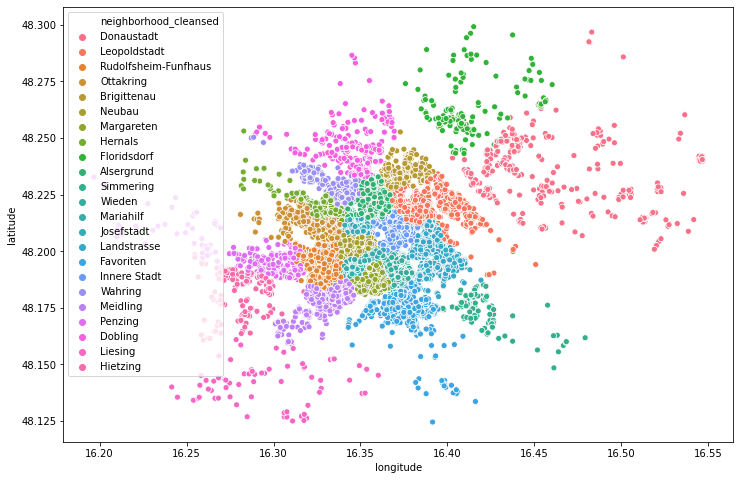

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.scatterplot(data=vienna3, x='longitude', y='latitude', hue='neighborhood_cleansed' )
plt.show()

### Replacing Values<a name="replace"></a>
As we saw previously, `map` can be used to modify a subset of values but `replace` can sometimes be simpler and more flexible. However, using `map` is sometimes more efficient for larger datasets.

In [61]:
data

,city,state,mascot
0,atlanta,GA,Falcons
1,Baltimore,MD,Ravens
2,boston,MA,Patriots
3,Buffalo,NY,Bills
4,charlotte,NC,Panthers


In [62]:
# using replace to replace a single value
data.replace('Panthers', np.nan, inplace=True)
data

,city,state,mascot
0,atlanta,GA,Falcons
1,Baltimore,MD,Ravens
2,boston,MA,Patriots
3,Buffalo,NY,Bills
4,charlotte,NC,NaN


In [63]:
# using replace to replace multiple values
data.replace(['Falcons', 'Ravens'], np.nan, inplace=True)
data

,city,state,mascot
0,atlanta,GA,NaN
1,Baltimore,MD,NaN
2,boston,MA,Patriots
3,Buffalo,NY,Bills
4,charlotte,NC,NaN


In [64]:
# using replace to replace different values using lists
data.replace(['Patriots','Bills'],[np.nan, 'Wings'])

,city,state,mascot
0,atlanta,GA,NaN
1,Baltimore,MD,NaN
2,boston,MA,NaN
3,Buffalo,NY,Wings
4,charlotte,NC,NaN


In [65]:
# using replace to replace different values using a dictionary
data.replace({'Patriots':np.nan, 'Bills':'Wings'}, inplace=True)
data

,city,state,mascot
0,atlanta,GA,NaN
1,Baltimore,MD,NaN
2,boston,MA,NaN
3,Buffalo,NY,Wings
4,charlotte,NC,NaN


#### Student Practice
Try to perform the following tasks on the `vienna` dataset. Then check your answers as I walk through the solutions. Unless the exercise asks you to create a new DataFrame, you can assume that you are to alter the original `vienna` data.

**Exercise:** Check the value counts for the property types.

In [66]:
vienna.property_type.value_counts()

Entire apartment                      7466
Private room in apartment             2405
Entire serviced apartment              287
Entire condominium                     281
Entire loft                            163
Entire house                           111
Private room in house                   96
Room in boutique hotel                  85
Private room in condominium             74
Shared room in apartment                64
Private room in bed and breakfast       42
Room in serviced apartment              38
Room in hotel                           30
Private room in loft                    26
Room in aparthotel                      23
Entire guest suite                      23
Private room in townhouse               16
Private room in hostel                  16
Private room in guesthouse              15
Entire townhouse                        14
Entire villa                            12
Shared room in hostel                   10
Entire bungalow                          8
Entire plac

**Exercise:** We want to combine some of these categories so that we eventually only have four categories: 'Apartment', 'House', 'Room', and 'Other'. For example, 'Entire house' and 'Entire cottage' can probably just be listed as 'House' to simplify the data.

First, combine the property types that you think could be simply represented by 'House' and 'Apartment' (Note: answers will vary based on how you break down the categories)

In [67]:
vienna.property_type.replace({'Entire apartment': 'Apartment',
                             'Entire serviced apartment':'Apartment',
                             'Entire condominium': 'Apartment',
                             'Entire loft': 'Apartment',
                             'Entire townhouse': 'House',
                             'Entire guesthouse': 'House',
                             'Entire house': 'House', 
                             'Entire bungalow':'House',
                             'Entire villa': 'House',
                             'Entire cabin': 'House',
                             'Entire chalet': 'House'
                              
                               }, inplace=True)

In [68]:
vienna.property_type.value_counts()

Apartment                             8197
Private room in apartment             2405
House                                  153
Private room in house                   96
Room in boutique hotel                  85
Private room in condominium             74
Shared room in apartment                64
Private room in bed and breakfast       42
Room in serviced apartment              38
Room in hotel                           30
Private room in loft                    26
Room in aparthotel                      23
Entire guest suite                      23
Private room in hostel                  16
Private room in townhouse               16
Private room in guesthouse              15
Shared room in hostel                   10
Entire place                             8
Room in bed and breakfast                7
Private room in serviced apartment       5
Private room in guest suite              5
Camper/RV                                4
Entire cottage                           3
Shared room

**Exercise:** Perform a similar task of combining property types that might be simply considered as a 'Room'. 

*Bonus:* You could perform this with `replace()` but it would take a long dictionary of values. Can you perform this using the Pandas [str.contains()](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html) method in one line of code?

In [69]:
vienna.loc[vienna['property_type'].str.contains('room', case=False, na=False), 'property_type'] = 'Room'

In [70]:
vienna.property_type.value_counts()

Apartment             8197
Room                  2986
House                  153
Entire guest suite      23
Entire place             8
Camper/RV                4
Entire cottage           3
Tiny house               2
Lighthouse               2
Castle                   1
Dome house               1
Entire hostel            1
Casa particular          1
Name: property_type, dtype: int64

**Exercise:** Change all other values not listed as 'House', 'Apartment', or 'Room' to 'Other'. 

*Bonus:* Again, you could perform this with `replace()`, but can you think of a way to do it in one line of code? Hint: You want to select everything where the property type is not 'House', 'Apartment', or 'Room' and code those as 'Other'.   

In [71]:
#vienna.loc[(vienna['property_type'] != 'Apartment') & (vienna['property_type'] != 'Room') & (vienna['property_type'] != 'House')] = 'Other'

In [72]:
# ~ means negating or doing the opisite of whatever code is specified after
vienna.loc[~vienna.property_type.isin(['House', 'Apartment', 'Room']), 'property_type'] = 'other'

**Exercise:** Check the property type value counts one last time to verify that you now only have four categories.

In [73]:
vienna.property_type.value_counts()

Apartment    8197
Room         2986
House         153
other          47
Name: property_type, dtype: int64

### Binning<a name="bin"></a>

Continuous data is often separated into 'bins' for analysis.

In [74]:
# setup list of birth years
year = [1955, 1964, 1975, 1985, 1960, 2001, 1978]

# setup bins 
bins = [1945, 1964, 1980, 1996, 2012]

# use the `cut()` function to divide years into their appropriate bins
cats = pd.cut(year, bins)

# returns a special `Categorical` object
cats

[(1945, 1964], (1945, 1964], (1964, 1980], (1980, 1996], (1945, 1964], (1996, 2012], (1964, 1980]]
Categories (4, interval[int64, right]): [(1945, 1964] < (1964, 1980] < (1980, 1996] < (1996, 2012]]

Uses mathematical notation for intervals.
- `(` is *open* (not included in the category)
- `]` is *closed* (inclusive)
- can change which side is closed by passing `right=False`

In [75]:
# can pass your own bin names
cats = pd.cut(year, bins, labels=['Baby Boomer', 'Generation X', 
                                  'Generation Y (Millennials)', 'Generation Z'])

In [76]:
# label for the year data
cats.codes

array([0, 0, 1, 2, 0, 3, 1], dtype=int8)

In [77]:
# categories for the year data
cats.categories

Index(['Baby Boomer', 'Generation X', 'Generation Y (Millennials)',
       'Generation Z'],
      dtype='object')

In [78]:
# value counts for the bins
pd.value_counts(cats)

Baby Boomer                   3
Generation X                  2
Generation Y (Millennials)    1
Generation Z                  1
dtype: int64

In [79]:
# create random array of data
data = np.random.rand(100)
data

array([0.83718971, 0.72535932, 0.62190843, 0.88432419, 0.88341431,
       0.32349278, 0.04383053, 0.662199  , 0.34672544, 0.0156076 ,
       0.57989905, 0.79879348, 0.08854928, 0.77313539, 0.30048799,
       0.78265004, 0.96668435, 0.4004984 , 0.94075704, 0.70241806,
       0.63460955, 0.31940636, 0.82939875, 0.10490515, 0.98604847,
       0.61587733, 0.15535896, 0.37361819, 0.77281739, 0.86495537,
       0.09827378, 0.29681303, 0.58201922, 0.60246924, 0.17676217,
       0.68903099, 0.3942287 , 0.83821058, 0.96781294, 0.336312  ,
       0.88022456, 0.13841857, 0.84521518, 0.71962371, 0.07877491,
       0.79187771, 0.48264741, 0.45619641, 0.90293701, 0.15067998,
       0.59159339, 0.66127386, 0.25256047, 0.74782773, 0.55044823,
       0.63942036, 0.19085091, 0.00722941, 0.2805471 , 0.93887698,
       0.44422774, 0.45108674, 0.74754587, 0.65625086, 0.06322985,
       0.27293841, 0.1173816 , 0.2248422 , 0.02738862, 0.39650897,
       0.21978031, 0.01872048, 0.14772549, 0.84466876, 0.38839

In [80]:
# equal length bins based on min and max values
pd.cut(data, 4, precision=2)

[(0.74, 0.99], (0.5, 0.74], (0.5, 0.74], (0.74, 0.99], (0.74, 0.99], ..., (0.5, 0.74], (0.74, 0.99], (0.5, 0.74], (0.25, 0.5], (0.25, 0.5]]
Length: 100
Categories (4, interval[float64, right]): [(0.0063, 0.25] < (0.25, 0.5] < (0.5, 0.74] < (0.74, 0.99]]

In [81]:
# create sample Series data
ser1 = pd.Series(np.random.rand(20))
ser1[[1,3,5]] = np.nan
ser1

0     0.449042
1          NaN
2     0.576925
3          NaN
4     0.696776
5          NaN
6     0.294403
7     0.915750
8     0.684169
9     0.377829
10    0.287489
11    0.194726
12    0.719439
13    0.432730
14    0.140881
15    0.366714
16    0.128594
17    0.852145
18    0.665693
19    0.489197
dtype: float64

In [82]:
# bin in four equal categories
ser1 = pd.cut(ser1, 4, precision=4, labels=['small','medium','large','x-large'])
ser1

0      medium
1         NaN
2       large
3         NaN
4       large
5         NaN
6       small
7     x-large
8       large
9      medium
10      small
11      small
12    x-large
13     medium
14      small
15     medium
16      small
17    x-large
18      large
19     medium
dtype: category
Categories (4, object): ['small' < 'medium' < 'large' < 'x-large']

In [84]:
ser1.cat.categories

Index(['small', 'medium', 'large', 'x-large'], dtype='object')

In [85]:
# add category - added to the front position
ser1 = ser1.cat.add_categories('not_measured')
ser1

0      medium
1         NaN
2       large
3         NaN
4       large
5         NaN
6       small
7     x-large
8       large
9      medium
10      small
11      small
12    x-large
13     medium
14      small
15     medium
16      small
17    x-large
18      large
19     medium
dtype: category
Categories (5, object): ['small' < 'medium' < 'large' < 'x-large' < 'not_measured']

In [86]:
# reorder categories so that new category is first
ser1 = ser1.cat.reorder_categories(['not_measured','small','medium','large','x-large'])
ser1

0      medium
1         NaN
2       large
3         NaN
4       large
5         NaN
6       small
7     x-large
8       large
9      medium
10      small
11      small
12    x-large
13     medium
14      small
15     medium
16      small
17    x-large
18      large
19     medium
dtype: category
Categories (5, object): ['not_measured' < 'small' < 'medium' < 'large' < 'x-large']

In [87]:
# make categories unordered
ser1 = ser1.cat.as_unordered()
ser1

0      medium
1         NaN
2       large
3         NaN
4       large
5         NaN
6       small
7     x-large
8       large
9      medium
10      small
11      small
12    x-large
13     medium
14      small
15     medium
16      small
17    x-large
18      large
19     medium
dtype: category
Categories (5, object): ['not_measured', 'small', 'medium', 'large', 'x-large']

In [88]:
# fillna with 'not_measured'
ser1 = ser1.fillna('not_measured')
#ser1 = ser1.fillna('missing') this will give an error becuase 'missing' is not a category. that is why we intially added 'not_measured' as a category, so we could actually fill missing values with a valid category
ser1

0           medium
1     not_measured
2            large
3     not_measured
4            large
5     not_measured
6            small
7          x-large
8            large
9           medium
10           small
11           small
12         x-large
13          medium
14           small
15          medium
16           small
17         x-large
18           large
19          medium
dtype: category
Categories (5, object): ['not_measured', 'small', 'medium', 'large', 'x-large']

In [89]:
# creating a categorical datatype with automatic categories
ser2 = pd.Series(['a','b','a','c','b','a']).astype('category')
ser2

0    a
1    b
2    a
3    c
4    b
5    a
dtype: category
Categories (3, object): ['a', 'b', 'c']

#### Student Practice
Try to perform the following tasks on the `vienna` dataset. Then check your answers as I walk through the solutions. Unless the exercise asks you to create a new DataFrame, you can assume that you are to alter the original `vienna` data.

**Exercise:** View the `host_response_time`, `host_response_rate`, and `host_acceptance_rate` columns of the `vienna` dataset.

In [90]:
vienna[['host_response_time', 'host_response_rate', 'host_acceptance_rate' ]]

,host_response_time,host_response_rate,host_acceptance_rate
id,,,
15883,NaN,NaN,100%
38768,within an hour,100%,98%
40625,within a few hours,90%,74%
51287,within an hour,100%,98%
70637,within a few hours,100%,71%
...,...,...,...
49169158,within a day,100%,NaN
49169449,within an hour,100%,87%
49169526,within a few hours,100%,100%


**Exercise:** For `host_response_time`, code all missing values as `unknown`

In [91]:
vienna.host_response_time.fillna('unknown', inplace=True)

**Exercise:** Make the `host_response_time` a categorical datatype.

In [92]:
vienna.host_response_time = vienna.host_response_time.astype('category')
vienna.host_response_time

id
15883                  unknown
38768           within an hour
40625       within a few hours
51287           within an hour
70637       within a few hours
                   ...        
49169158          within a day
49169449        within an hour
49169526    within a few hours
49170145               unknown
49171797    within a few hours
Name: host_response_time, Length: 11383, dtype: category
Categories (5, object): ['a few days or more', 'unknown', 'within a day', 'within a few hours', 'within an hour']

**Exercise:** First, run the code below to turn the `host_acceptance_rate` and `host_response_rate` from strings to floats. 

Note that the `regex=True` determines if the passed-in pattern is a regular expression:

- If True, assumes the passed-in pattern is a regular expression.

- If False, treats the pattern as a literal string

In [93]:
#vienna['host_acceptance_rate']
#vienna.loc[:,'host_response_rate']
vienna['host_acceptance_rate'].value_counts()

100%    3222
98%      416
99%      412
0%       273
96%      264
        ... 
77%        1
52%        1
59%        1
10%        1
61%        1
Name: host_acceptance_rate, Length: 71, dtype: int64

In [94]:
# change string values to floats
vienna.loc[:,'host_acceptance_rate'] = vienna.loc[:,'host_acceptance_rate'].str.replace('\%', '', regex=True).astype(float)
vienna.loc[:,'host_response_rate'] = vienna.loc[:,'host_response_rate'].str.replace('\%', '', regex=True).astype(float)

**Exercise:** Create the following bins for the `host_acceptance_rate` and `host_response_rate` columns
- 0 - 49
- 50 - 79
- 80 - 89
- 90 - 99
- 100

In [95]:
bins = [0,49,79,89,99,100]
vienna['host_acceptance_rate'] = pd.cut(vienna.host_acceptance_rate, bins, labels = ['0-49','50-79','80-89','90-99','100'])
vienna['host_response_rate'] = pd.cut(vienna.host_response_rate, bins, labels = ['0-49','50-79','80-89','90-99','100'])

In [96]:
# verify results
vienna['host_response_rate']

id
15883         NaN
38768         100
40625       90-99
51287         100
70637         100
            ...  
49169158      100
49169449      100
49169526      100
49170145      NaN
49171797      100
Name: host_response_rate, Length: 11383, dtype: category
Categories (5, object): ['0-49' < '50-79' < '80-89' < '90-99' < '100']

**Exercise:** 
1. Add a new `unknown` category for both `host_response_rate` and `host_acceptance_rate`. 
2. Re-order the categories so that `unknown` is first.
3. Fill all missing values in these two columns with the `unknown` category.

In [97]:
### ENTER CODE HERE ###  cat.add_categories('not_measured')
vienna['host_acceptance_rate'] = vienna['host_acceptance_rate'].cat.add_categories('unknown')
vienna['host_response_rate'] = vienna['host_response_rate'].cat.add_categories('unknown')
vienna['host_response_rate']

id
15883         NaN
38768         100
40625       90-99
51287         100
70637         100
            ...  
49169158      100
49169449      100
49169526      100
49170145      NaN
49171797      100
Name: host_response_rate, Length: 11383, dtype: category
Categories (6, object): ['0-49' < '50-79' < '80-89' < '90-99' < '100' < 'unknown']

In [98]:
#ser1.cat.reorder_categories(['not_measured','small','medium','large','x-large'])
vienna['host_acceptance_rate'] = vienna['host_acceptance_rate'].cat.reorder_categories(['unknown','0-49','50-79','80-89','90-99','100'])
vienna['host_response_rate'] = vienna['host_response_rate'].cat.reorder_categories(['unknown','0-49','50-79','80-89','90-99','100'])

In [99]:
vienna['host_acceptance_rate'].fillna('unknown', inplace=True)
vienna['host_response_rate'].fillna('unknown', inplace=True)

In [100]:
#check values
vienna[['host_response_time', 'host_response_rate', 'host_acceptance_rate' ]]

,host_response_time,host_response_rate,host_acceptance_rate
id,,,
15883,unknown,unknown,100
38768,within an hour,100,90-99
40625,within a few hours,90-99,50-79
51287,within an hour,100,90-99
70637,within a few hours,100,50-79
...,...,...,...
49169158,within a day,100,unknown
49169449,within an hour,100,80-89
49169526,within a few hours,100,100


### Detecting & Filtering Outliers<a name="outlier"></a>

In [101]:
# create DataFrame of normally distributed data
data = pd.DataFrame(np.random.randn(1000, 4))
data

,0,1,2,3
0,-0.651351,-1.392607,1.045254,-0.194720
1,0.121079,0.507230,0.794660,-0.661981
2,-0.088559,-0.952313,0.078048,1.167952
3,1.150980,-1.560503,-1.109477,0.632489
4,-2.076211,-0.343737,-1.776275,-0.576417
...,...,...,...,...
995,1.901510,-0.389727,1.730213,-1.067951
996,-0.018809,-0.819434,1.748740,-0.952606
997,0.260436,0.161325,-1.063259,-0.218654
998,1.731182,0.084304,-0.308984,-0.872049


In [102]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.075946,0.032050,-0.014150,0.009180
std,0.984380,1.004498,1.015306,1.000520
min,-3.164606,-2.926579,-2.874972,-2.674113
25%,-0.715545,-0.656326,-0.735765,-0.654650
50%,-0.032742,0.010303,-0.030418,-0.033782
75%,0.562008,0.703042,0.708949,0.664675
max,2.605788,3.024372,2.808896,3.285616


In [103]:
# select values in column 1 that have values exceeding 3 in absolute value
column1 = data[1]
column1[np.abs(column1) > 3]

183    3.024372
Name: 1, dtype: float64

In [104]:
# select all rows having a value exceeding 3 or -3
data[(np.abs(data) > 3).any(1)]

,0,1,2,3
5,-0.012871,-1.499792,0.980746,3.062044
183,-0.239053,3.024372,-0.108386,-0.127448
193,-3.137149,0.614623,-1.626612,-1.028855
639,0.712493,2.812070,-0.601186,3.165510
764,1.028122,1.896318,1.264948,3.285616
877,-3.164606,0.442918,-1.643852,-1.272848


In [105]:
# now set the values based on this criteria
data[np.abs(data) > 3] = np.sign(data) * 3

In [106]:
# look at results
data[(np.abs(data) == 3).any(1)]

,0,1,2,3
5,-0.012871,-1.499792,0.980746,3.000000
183,-0.239053,3.000000,-0.108386,-0.127448
193,-3.000000,0.614623,-1.626612,-1.028855
639,0.712493,2.812070,-0.601186,3.000000
764,1.028122,1.896318,1.264948,3.000000
877,-3.000000,0.442918,-1.643852,-1.272848


In [107]:
# notice min and max
data.describe() 

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.075644,0.032026,-0.014150,0.008667
std,0.983458,1.004425,1.015306,0.998927
min,-3.000000,-2.926579,-2.874972,-2.674113
25%,-0.715545,-0.656326,-0.735765,-0.654650
50%,-0.032742,0.010303,-0.030418,-0.033782
75%,0.562008,0.703042,0.708949,0.664675
max,2.605788,3.000000,2.808896,3.000000


In [108]:
# np.sign() produces 1 and -1 values based on positive/negative
np.sign(data).head()

,0,1,2,3
0,-1.0,-1.0,1.0,-1.0
1,1.0,1.0,1.0,-1.0
2,-1.0,-1.0,1.0,1.0
3,1.0,-1.0,-1.0,1.0
4,-1.0,-1.0,-1.0,-1.0


Now, let's look at the `price` column in the `vienna` dataset.

In [109]:
# view price
vienna['price']

id
15883       $87.00 
38768       $60.00 
40625       $88.00 
51287       $60.00 
70637       $50.00 
             ...   
49169158    $93.00 
49169449    $75.00 
49169526    $24.00 
49170145    $49.00 
49171797    $18.00 
Name: price, Length: 11383, dtype: object

In [110]:
# remove dollar signs and commas; change to float
vienna['price'] = vienna['price'].str.replace('\$', '', regex=True).str.replace(',','').astype(float)

In [111]:
# verify results
vienna['price']

id
15883       87.0
38768       60.0
40625       88.0
51287       60.0
70637       50.0
            ... 
49169158    93.0
49169449    75.0
49169526    24.0
49170145    49.0
49171797    18.0
Name: price, Length: 11383, dtype: float64

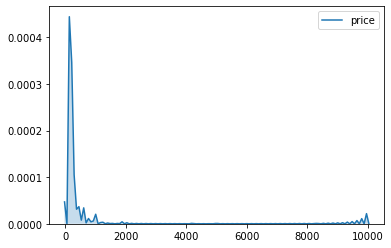

In [112]:
# let's plot the price data
sns.kdeplot(data=vienna['price'], shade='fill')
plt.show()

In [113]:
# check min price
vienna['price'].min()

0.0

In [114]:
# remove instances with $0 price
vienna = vienna.drop(vienna[vienna['price'] == 0].index)

vienna['price'].min()

9.0

In [115]:
# example to explain previous index code 
vienna[vienna['price'] == 9.0].index

Int64Index([23848728, 24443919, 37800761, 37801571, 38262713, 40673594,
            40845509, 40845756, 44230207, 45797045, 45798021, 45973934,
            46159502, 46757065, 46939763, 47710508, 47852675, 48063916,
            48650922],
           dtype='int64', name='id')

In [116]:
# check max price
vienna['price'].max()

10020.0

In [117]:
# 99% of data fall below the following price
top = int(vienna['price'].quantile(0.99))
top

459

In [118]:
# remove top 1% outliers
vienna = vienna.drop(vienna[vienna['price'] > top].index)

vienna['price'].max()

458.0

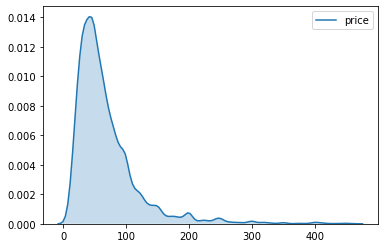

In [119]:
# check new kde plot with outliers removed
sns.kdeplot(data=vienna['price'], shade='fill')
plt.show()

### Dummy Variables<a name="dummy"></a>

Convert categorical variables into dummy variables as a lot of machine learning algorithms work specifically with numerical data.

In [120]:
# create a simple series
ser = pd.Series(['dog','cat','dog','horse'])
ser

0      dog
1      cat
2      dog
3    horse
dtype: object

In [121]:
# creates a seperate columnmn for every category
# for example, for the dog column, the 1st row = dog, therefoer '1' was encoded
pd.get_dummies(ser)

,cat,dog,horse
0,0,1,0
1,1,0,0
2,0,1,0
3,0,0,1


In [122]:
pd.get_dummies(ser, prefix='animal')

,animal_cat,animal_dog,animal_horse
0,0,1,0
1,1,0,0
2,0,1,0
3,0,0,1


In [123]:
# reduces correlation and dimensionality of data
pd.get_dummies(ser, drop_first=True)

,dog,horse
0,1,0
1,0,0
2,1,0
3,0,1


In [124]:
ser1 = ['cat','dog',np.nan]
ser1

['cat', 'dog', nan]

In [125]:
pd.get_dummies(ser1)

,cat,dog
0,1,0
1,0,1
2,0,0


In [126]:
pd.get_dummies(ser1, dummy_na=True)

,cat,dog,NaN
0,1,0,0
1,0,1,0
2,0,0,1


#### Student Practice
Try to perform the following tasks on the `vienna` dataset. Then check your answers as I walk through the solutions. Unless the exercise asks you to create a new DataFrame, you can assume that you are to alter the original `vienna` data.

**Exercise:** What are the values and counts for the following three columns: `host_is_superhost`, `room_type`, and `property_type`?

In [127]:
print(vienna['host_is_superhost'].value_counts())
print('------------------------')
print(vienna['room_type'].value_counts())
print('------------------------')
print(vienna['property_type'].value_counts())

f    8399
t    2865
Name: host_is_superhost, dtype: int64
------------------------
Entire home/apt    8317
Private room       2789
Shared room          86
Hotel room           71
Name: room_type, dtype: int64
------------------------
Apartment    8115
Room         2956
House         149
other          44
Name: property_type, dtype: int64


**Exercise:** Use `get_dummies()` with the `room_type` and `property_type`columns. Add a prefix of your choosing and drop the first dummy variable for each. *Note: I didn't show you how to work with columns within a DataFrame. See if you can look at the [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) to figure this out so that you update the `vienna` DataFrame.*

In [128]:
vienna = pd.get_dummies(vienna, columns=['room_type','property_type'], prefix=['room', 'property'], drop_first=True)
vienna.head()

,name,description,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,neighborhood_cleansed,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,amenities,price,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,room_Hotel room,room_Private room,room_Shared room,property_House,property_Room,property_other
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15883,b&b near Old Danube river,"Four rooms, each one differently and individua...",62142.0,12/11/2009,unknown,unknown,100,f,6.0,Donaustadt,48.24262,16.42767,3.0,1 bath,1.0,2.0,"[""Hot water"", ""High chair"", ""Essentials"", ""Hai...",87.0,11.0,4/10/2015,2/19/2020,95.0,10.0,10.0,10.0,10.0,9.0,9.0,4.0,0.15,1,0,0,0,1,0
38768,central cityapartement- wifi- nice neighbourhood,39m² apartment with beautiful courtyard of the...,166283.0,7/14/2010,within an hour,100,90-99,t,3.0,Leopoldstadt,48.21924,16.37831,5.0,1 bath,1.0,3.0,"[""Cooking basics"", ""Shampoo"", ""Kitchen"", ""Host...",60.0,324.0,3/23/2011,10/10/2020,95.0,10.0,9.0,10.0,10.0,10.0,10.0,3.0,2.64,0,0,0,0,0,0
40625,"Near Palace Schönbrunn, Apt. 1",Welcome to my Apt. 1!<br /><br />This is a 2be...,175131.0,7/20/2010,within a few hours,90-99,50-79,t,16.0,Rudolfsheim-Fnfhaus,48.18434,16.32701,6.0,1 bath,2.0,4.0,"[""Cooking basics"", ""Children\u2019s books and ...",88.0,156.0,8/4/2010,2/15/2021,97.0,10.0,10.0,10.0,10.0,9.0,9.0,15.0,1.20,0,0,0,0,0,0
51287,little studio- next to citycenter- wifi- nice ...,small studio in new renovated old house and ve...,166283.0,7/14/2010,within an hour,100,90-99,t,3.0,Leopoldstadt,48.21778,16.37847,3.0,1 bath,1.0,2.0,"[""Cooking basics"", ""Shampoo"", ""Kitchen"", ""Host...",60.0,310.0,1/27/2011,1/4/2021,92.0,10.0,9.0,10.0,10.0,10.0,9.0,3.0,2.49,0,0,0,0,0,0
70637,Flat in the Center with Terrace,<b>The space</b><br />My apartment (including ...,358842.0,1/23/2011,within a few hours,100,50-79,t,3.0,Leopoldstadt,48.21760,16.38018,2.0,2 shared baths,1.0,2.0,"[""Cooking basics"", ""Indoor fireplace"", ""Shampo...",50.0,116.0,3/28/2011,12/23/2019,95.0,10.0,9.0,10.0,9.0,10.0,10.0,3.0,0.95,0,1,0,0,1,0


In [129]:
#pd.get_dummies(vienna['room_type'], prefix='airbnb', drop_first=True)
# if 0 all accross then Entire home/apt

In [130]:
#pd.get_dummies(vienna['property_type'], prefix='airbnb', drop_first=True)
# if all zeros then Apartment

**Exercise:** To make sure you understand what `get_dummies()` is doing, can you take the `host_is_superhost` column and turn the values into dummy variables without using `get_dummies()`? Make sure that you only have one column called `superhost` after you are finished and the original column is deleted.

In [131]:
vienna['host_is_superhost'].value_counts()

f    8399
t    2865
Name: host_is_superhost, dtype: int64

In [132]:
vienna['host_is_superhost'].head()

id
15883    f
38768    t
40625    t
51287    t
70637    t
Name: host_is_superhost, dtype: object

In [133]:
result = []
for i in vienna['host_is_superhost']:
        if i == 't':
            result.append(1)
        if i == 'f':
            result.append(0)

vienna['superhost'] = result
vienna['superhost']
  

id
15883       0
38768       1
40625       1
51287       1
70637       1
           ..
49169158    0
49169449    0
49169526    0
49170145    0
49171797    0
Name: superhost, Length: 11264, dtype: int64

In [134]:
vienna[['superhost']]

,superhost
id,
15883,0
38768,1
40625,1
51287,1
70637,1
...,...
49169158,0
49169449,0
49169526,0


In [135]:
vienna.drop('host_is_superhost', axis=1, inplace=True)
vienna.head()`

SyntaxError: invalid syntax (<ipython-input-135-9288abee3796>, line 2)

In [ ]:
# also you could map

#super_map = {'f':0, 't':1}

#vienna['superhost'] = vienna['host_is_superhost'].map(supermap)

## String Manipulation<a name="string"></a>

### String Object Methods<a name="string_object"></a>

One of Pythons most popular strengths is its ability to work with strings and text. Some of the more simple operations can easily be done with the built in string methods.

In [ ]:
# create simple string of text
a = 'Jimmy,Anderson,  jimmy@gmail.com'
a

In [ ]:
# using the split() method
a.split(',') # splits text on the comma

In [ ]:
# strip() removes whitespace from around character
b = [x.strip() for x in a.split(',')]
b

In [ ]:
# joining strings within a list
'++'.join(b)

In [ ]:
# count of number of commas
a.count(',')

In [ ]:
# replace strings in text
a.replace(',','')

There are many more [string methods](https://www.w3schools.com/python/python_ref_string.asp) that you can research, and you will learn more about some of these in the 575 Python class if you haven't already taken it.

Now, let's try to clean up the 'messy' `amenities` column from the `vienna` data. 

In [ ]:
# view the amenities for one property
vienna.iloc[0]['amenities']

In [ ]:
# create an empty list
all_amenities = []

# iterate through rows, extending amenities to list
for row in vienna.amenities:
    all_amenities.extend(row.replace('[','').replace(']','').replace('"','').lower().strip().split(','))

In [ ]:
all_amenities

In [ ]:
amenities_list = pd.unique(all_amenities)
amenities_list

In [ ]:
### Note: You are not responsible for knowing how to do this part of the code. This is to show you what can be done. ###
amenity_values = vienna['amenities']
amenity_values

In [ ]:
# check the following for more information: https://docs.python.org/3/library/collections.html#collections.Counter
from collections import Counter

# create Series of amenities column
amenity_values = vienna['amenities']

# instantiate counter object
counter = Counter()

# update counter with each amenity and its total
for response in amenity_values:
    counter.update(response.replace('[','').replace(']','').replace('"','').lower().split(','))

# create two empty lists    
amenities_list = []
amenities_count = []

# iterate through most common amenities in counter and append to lists
for item in counter.most_common(50):
    amenities_list.append(item[0])
    amenities_count.append(item[1])
    
most_common_amenities = zip(amenities_list,amenities_count)
print(list(most_common_amenities))

In [ ]:
def amenities_to_columns(data):
    '''
    Creates new amenity features if the list of amenities for a respective property includes
    certain key words.
    
    Returns: DataFrame
    '''
    # create list of new amenity columns
    new_columns = ['tv','longterm','washing','cooking','fridge','fireplace','free_parking','paid_parking',
                   'air_conditioning','balcony','water_access','coffee','breakfast','family','workspace']
    
    #search 'amenities' feature for keywords, create new column and dummy variable if true
    data.loc[data['amenities'].str.contains('tv|cable|amazon prime|netflix', case=False), 'tv'] = 1
    data.loc[data['amenities'].str.contains('long term', case=False), 'longterm'] = 1
    data.loc[data['amenities'].str.contains('washer|dishwasher', case=False), 'washing'] = 1
    data.loc[data['amenities'].str.contains('stove|oven|microwave', case=False), 'cooking'] = 1
    data.loc[data['amenities'].str.contains('refrigerator|freezer|fridge', case=False), 'fridge'] = 1
    data.loc[data['amenities'].str.contains('fireplace|fire pit', case=False), 'fireplace'] = 1
    data.loc[data['amenities'].str.contains('free parking|free street parking', case=False), 'free_parking'] = 1
    data.loc[data['amenities'].str.contains('paid parking|paid street parking',case=False), 'paid_parking'] = 1
    data.loc[data['amenities'].str.contains('air conditioning|central air conditioning', case=False), 'air_conditioning'] = 1
    data.loc[data['amenities'].str.contains('balcony|patio', case=False), 'balcony'] = 1
    data.loc[data['amenities'].str.contains('hot tub|waterfront|pool|lake|beachfront', case=False), 'water_access'] = 1
    data.loc[data['amenities'].str.contains('coffee|coffee machine|nespresso', case=False), 'coffee'] = 1
    data.loc[data['amenities'].str.contains('breakfast', case=False), 'breakfast'] = 1
    data.loc[data['amenities'].str.contains('high chair|crib|children|child|baby|family', case=False), 'family'] = 1
    data.loc[data['amenities'].str.contains('workspace', case=False), 'workspace'] = 1

    # replace na's with 0
    data[new_columns] = data[new_columns].fillna(0)
    
    return data
    
vienna = amenities_to_columns(vienna)

In [ ]:
vienna = vienna.drop('amenities', axis=1)
vienna.head()

### Regular Expressions<a name="regex"></a>

While string methods are powerful and can be used in a lot of different ways, sometimes you need a way to search a more complex string pattern. This is where regular expressions (`regex`) offer a flexible way to search or match complex patterns.

Regex could be an entire module on its own, but we will cover some of the basics now.

https://www.dataquest.io/wp-content/uploads/2019/03/python-regular-expressions-cheat-sheet.pdf

In [ ]:
# import the re module
import re

In [ ]:
# create a simple text message
text = 'A     Lannister\tnever\nforgets'

# split strings based on whitespace characters (tabs, spaces, newlines)
re.split('\s+', text)

When you call `re.split()` it is first compiled, then the split method is called on the passed text. You can compile the regex yourself, which is highly recommended if you apply the same expression to many strings. This will also save you CPU cycles. 

In [ ]:
# setup text of names and emails
emails = """
James james.anderson@eastern.edu
Sally sally@gmail.com
Ryan ryan22@yahoo.com
"""

# creating pattern using raw string literal
pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b' 

# compile the regex
regex = re.compile(pattern, flags=re.IGNORECASE)

In [ ]:
# returns all matches in a string
regex.findall(emails)

In [ ]:
# returns only the first match
position = regex.search(emails) # first email, start and end position
position

In [ ]:
emails[position.start():position.end()]

In [ ]:
# only matches the beginning of the string
print(regex.match(emails)) #only match if pattern occurs at the start of the string

In [ ]:
# simple program to validate an email

#create email list
email_list = ['james.anderson@eastern.edu','sally@gmail.com','ryan22@yahoo']

# iterate through emails
for email in email_list:
    if (re.fullmatch(regex, email)):
        print("Valid Email")
 
    else:
        print("Invalid Email")
        

In [ ]:
# returns new string with occurrences of the pattern replaced by the new string
print(regex.sub('REDACTED', emails))

In [ ]:
# wrap parentheses around different segments
pattern2 = r'(\b[A-Za-z0-9._%+-]+)@([A-Za-z0-9.-]+)\.([A-Z|a-z]{2,}\b)'

# compile with new pattern
regex = re.compile(pattern2, flags=re.IGNORECASE)

# returns tuple of matched components
segments = regex.match('jamie.andrews@eastern.edu')
segments

segments.groups()

Let's look at a practical example using our `vienna` dataset. We need to turn the strings as listed in the `bathrooms_text` column to floats.

In [ ]:
# view column
vienna['bathrooms_text'].value_counts()

In [ ]:
pattern = r"[-+]?\d*\.\d+|\d+"
# [-+] --> handles plus or minus signs
# ? -->  matches the expression to its left 0 or 1 times.
# \d --> matches digits
# * --> matches the expression to its left 0 or more times.
# \. --> escapes the decimal character
# + --> y matches the expression to its left 1 or more times.
# | --> matches expression before or after 


def bathroomtext_to_num(text):
    '''
    Strips out number from bathrooms_text field 
    
    Returns: float
    '''
    pattern = r"[-+]?\d*\.\d+|\d+"  
    regex = re.compile(pattern)
    num_baths = regex.findall(str(text))
    
    if 'half' in str(text).lower():
        return 0.5
    elif num_baths == []:
        return 1
    else:
        return num_baths[0]

# apply custom function to 'bathrooms_text' column
vienna['bathrooms'] = vienna.apply(lambda row: bathroomtext_to_num(row['bathrooms_text']), axis=1).astype('float64')


In [ ]:
# view new 'bathrooms' feature
vienna[['bathrooms','bathrooms_text']].head(10)

In [ ]:
vienna = vienna.drop('bathrooms_text', axis=1)

In [ ]:
vienna.head()  

## Extra Practice: Plotting and Miscellaneous<a name='extra'></a>

**Exercise:** Plot a [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) of longitude and latitude using the 'free_parking' attribute as the color. What do you notice about properties with free parking?

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=vienna,x='longitude', y='latitude')

**Exercise:** Plot a scatterplot of longitude and latitude using price as the color. Do you notice any discerable pattern in terms of price versus the area of Vienna?

In [ ]:
# no 'free_parking'column
for i in vienna.columns:
    print(i)

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=vienna,x='longitude', y='latitude', hue='price')

**Exercise:** Plot a [violin plot](https://seaborn.pydata.org/generated/seaborn.violinplot.html) using the price and the neighborhood name. What neighborhoods seem to have the largest range and highest median prices?

In [ ]:
plt.figure(figsize=(12,8))
sns.violinplot(data=vienna, x='price', y='neighborhood_cleansed')

**Exercise:** What areas have the most listings? Create a [horizontal bar chart](https://seaborn.pydata.org/generated/seaborn.countplot.html) to show these listings by neighborhood.

In [ ]:
sns.countplot(data=vienna, y='neighborhood_cleansed', orient='h', order=vienna.neighborhood_cleansed.value_counts().index)

**Exercise:** Using a pivot table, show the top hosts (represented by `host_id`) that have the most multiple listings (`calculated_host_listings_count`).

In [ ]:
vienna.pivot_table('calculated_host_listings_count', index='host_id').sort_values(by='calculated_host_listings_count', ascending=False)

**Exercise:** How many beds, bedrooms, and bathrooms do most properties have? What percentage of properties have those respective most common values?

In [ ]:
print(vienna.beds.value_counts().nlargest(5))
print('------------------')
print(vienna.bathrooms.value_counts().nlargest(5))
print('------------------')
print(vienna.bedrooms.value_counts().nlargest(5))

In [ ]:
print(vienna.beds.value_counts(normalize=True).nlargest(5).round(2))
print('------------------')
print(vienna.bathrooms.value_counts(normalize=True).nlargest(5).round(2))
print('------------------')
print(vienna.bedrooms.value_counts(normalize=True).nlargest(5).round(2))

**Exercise:** Similar to how we binned the `host_response_time`, `host_response_rate`, and `host_acceptance_rate`, perform a similar binning for the various review scores attributes.
    
- `review_scores_rating`: bin the review scores between '0-79', '80-94','95-99' and '100'.
- other review ratings: bin these scores between '0-8','9', and '10'
- add an unknown category and fill the na's with 'unkown' (don't forget to reorder your categories so that 'unknown' is first)

In [136]:
vienna.review_scores_rating

id
15883       95.0
38768       95.0
40625       97.0
51287       92.0
70637       95.0
            ... 
49169158     NaN
49169449     NaN
49169526     NaN
49170145     NaN
49171797     NaN
Name: review_scores_rating, Length: 11264, dtype: float64

In [137]:
#vienna.review_scores_rating.fillna('unknown', inplace=True)

In [140]:
bins = [0,79,94,99,100]
vienna['review_scores_rating'] = pd.cut(vienna.review_scores_rating, bins=bins, labels=['0-79', '80-94','95-99','100'])

#then change to categorical data type
#vienna['review_scores_rating'] = vienna['review_scores_rating'].astype('category')

#add 'unknown'
vienna['review_scores_rating'] = vienna['review_scores_rating'].cat.add_categories('unknown')

#reorder so 'unknown' is first
vienna['review_scores_rating'] = vienna['review_scores_rating'].cat.reorder_categories(['unknown','0-79', '80-94','95-99','100'])

#now fill na's with 'unknown'
vienna['review_scores_rating'].fillna('unknown', inplace=True)

#let's check
vienna['review_scores_rating']

TypeError: '<' not supported between instances of 'int' and 'str'

## Conclusion<a name="conclusion"></a>

In reality, a lot more needs to be done to this dataset before it is ready for a machine learning algorithm to be run. Also, as I mentioned above, there are sometimes easier ways to perform some of these data manipulations using Scikit-learn, which you will learn about more in the machine learning classes.

After cleaning up the data further, checking for correlation between the attributes, dropping attributes and creating some new ones using this data, the best machine learning model was able to predict **66%** of the price using this data with a RMSE score of **0.3643** (the target value was changed to use the log of the price).

Given the above results, my conclusion is that this data can be used to predict prices somewhat but more work or more data is needed to create a better model. Future work could involve:

- performing analysis on the photos and determine if they have an impact on price
- performing a sentiment analysis on the foreign language comments (from a different file on the InsideAirbnb website) to determine if the guest comments could be an indicator of price. I was able to perform a sentiment analysis on the English language comments and there was not much impact on the model.
- further feature extraction/elimination
- prices are the listed prices from the Airbnb website. A more accurate model might be obtained by using the prices that guests actually paid for a property
- personally scrape data from the Aribnb website to obtain more information than what is listed in the file